In [9]:
# Импорт базовых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка набора данных «breast_cancer»
from sklearn.datasets import load_wine
wine = load_wine()

In [10]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [11]:
# Получение описания набора данных
description = wine.DESCR


# Получение массива названий признаков объектов
feature_names = wine.feature_names


# Создание датафрейма с признаками объектов
x = pd.DataFrame(wine.data, columns=feature_names)
y = pd.DataFrame(wine.target, columns=['class'])


In [12]:
# В первую очередь, необходимо масштабировать все признаки, чтобы они имели
# одинаковую значимость
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x, columns=feature_names)

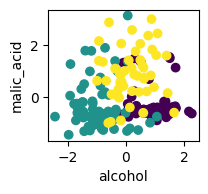

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
# Признаковое пространство после масштабирования
fig = plt.figure()
for i in range(12):
    axs = fig.add_subplot(3, 4, i+1,
                          xlabel=feature_names[i % 12],
                          ylabel=feature_names[(i+1) % 12])
    gph = axs.scatter(x[feature_names[i % 12]],
                      x[feature_names[(i+1) % 12]],
                      c=np.array(y))
    plt.tight_layout(pad=0)
    plt.show()

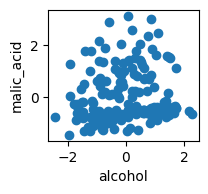

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [14]:
# Теперь предположим, что мы не знаем значения классов и нам нужно их определить
# то есть произвести кластеризацию
fig = plt.figure()
for i in range(12):
    axs = fig.add_subplot(3, 4, i+1,
                          xlabel=feature_names[i % 12],
                          ylabel=feature_names[(i+1) % 12])
    gph = axs.scatter(x[feature_names[i % 12]],
                      x[feature_names[(i+1) % 12]])
    plt.tight_layout(pad=0)
    plt.show()

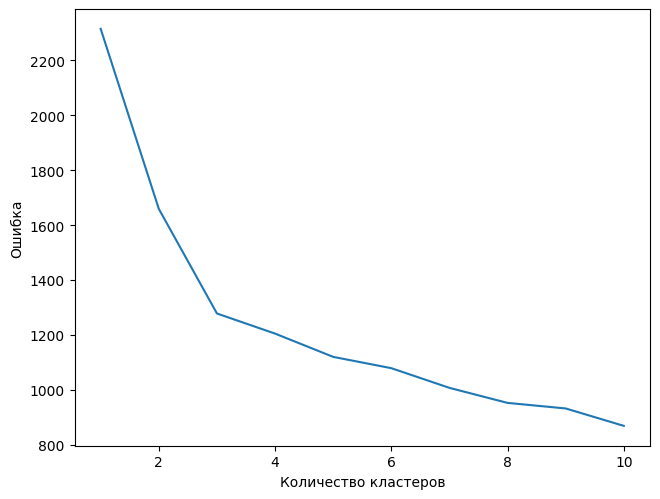

In [15]:
# Для начала определим оптимальное число кластеров

# Импортируем класс KMEANS
from sklearn.cluster import KMeans

# Будем перебирать разные модели с числом кластеров от 1 до N и сравним ошибки
# Ошибки будем хранить в массиве errors
N = 10
errors = np.zeros(N)

# Запустим цикл по моделям
for i in range(N):

    # Создание отдельной модели
    kmeans = KMeans(n_clusters=i+1, max_iter=300)

    # Обучение модели
    kmeans.fit(x)

    # Рассчитаем ошибку данной модели
    e = kmeans.inertia_

    # Сохраним ошибку в массива ошибок
    errors[i] = e

# Посмотрим на зависимость ошибки от количества кластеров
fig = plt.figure()
axs = fig.add_subplot(xlabel='Количество кластеров', ylabel='Ошибка')
gph = axs.plot(range(1, N+1), errors)
plt.tight_layout(pad=0)
plt.show()

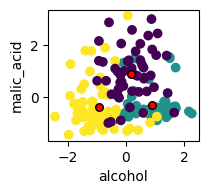

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
# Произведем кластеризацию с помощью модели k-means с число кластеров = 3


kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(x)
y_pred = kmeans.predict(x)


# Признаковое пространство для предсказанных классов
# Добавим центры кластеров
x_center = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
fig = plt.figure()
for i in range(12):
    axs = fig.add_subplot(3, 4, i+1,
                          xlabel=feature_names[i % 12],
                          ylabel=feature_names[(i+1) % 12])
    gph1 = axs.scatter(x[feature_names[i % 12]],
                      x[feature_names[(i+1) % 12]],
                      c=np.array(y_pred))
    gph2 = axs.scatter(x_center[feature_names[i % 12]],
                        x_center[feature_names[(i+1) % 12]],
                        s=30, edgecolor='k', color='r')
    plt.tight_layout(pad=0)
    plt.show()
